# Tutorial 5

Today we will do some exercises using various functionalities of `numpy` and `pandas`. There are too many functionalities in these packages to cover in lectures. Therefore it is critical to be able to read the online documentation and understand what a function does. The documentation of `numpy` can be found at [here](https://numpy.org/doc/1.18/). The documentation `pandas` can be found at [here](https://pandas.pydata.org/docs/reference/index.html#api). Sometimes, it is easier to google than to look up the documentation.

## Question 1: matrix computation with `numpy`

Let $n=100$ and $m=150$. Generate an $m\times m$ matrix $A$ and an $n\times m$ matrix $B$, where each entry in both matrices are drawn from a standard normal random variable (using `numpy.random.normal`). Also generate a vector $b$ with entries drawn from a uniform random variable (using `numpy.random.uniform`). Plot histograms of entries of $A$, $B$, and $b$ to verify that they are indeed drawn from the correct distribution. In order to plot histograms of entries of a matrix, you need to flatten a matrix into a 1D array, which can be achieved by the `numpy.ndarray.flatten()` method.

1. Calculate $A+A$, $A A^t$, $A^t A$ and $AB$.
1. Solve for $x$ where $Bx = b$.
1. Let $C=A^t A$, which you have computed. Note that $C$ is a symmetric real matrix (hence a Hermitian matrix), but it is not of full rank. Find all eigenvalues and eigenvectors of $C$ using either `numpy.linalg.eig` or `numpy.linalg.eigh`. Notice that `numpy.linalg.eig` will output complex eigenvalues. What is the largest imaginary part of these eigenvalues? Sort the eigenvalues and plot them. How many "real" eigenvalues are there?

[[ 1.61566618  0.28683544 -1.83076826 ... -1.34931338  0.41188199
  -1.30975502]
 [-1.1870908   3.21438468  1.55710045 ...  1.09767729  1.56979848
   0.93884192]
 [ 1.74218445  0.16529923  1.71118801 ... -1.71541793  2.03324608
  -0.62855936]
 ...
 [ 0.7150559   0.14028585 -0.46163012 ... -0.11043132  3.14350492
  -1.22559042]
 [ 1.09529133 -2.0565293   1.4460177  ...  0.93504268  2.42442641
  -0.60185631]
 [-0.31633118  0.08057631  2.01804599 ...  1.34453904  0.77541292
  -1.0065966 ]] [[ 8.22142429e-03 -4.15346899e+00  9.84627647e-01 ...  2.35522783e-01
   1.31562465e+00 -6.04650778e-02]
 [-4.15346899e+00  1.95886614e-01 -8.63618378e-01 ...  1.52079213e-01
  -7.02985238e-04  3.28631091e-01]
 [ 9.84627647e-01 -8.63618378e-01  1.76461629e+00 ...  9.25350618e-01
  -6.60488733e-01 -1.61126200e+00]
 ...
 [ 2.35522783e-01  1.52079213e-01  9.25350618e-01 ...  1.40205342e+00
  -8.52803835e-02  6.93185292e-01]
 [ 1.31562465e+00 -7.02985238e-04 -6.60488733e-01 ... -8.52803835e-02
   1.50595738

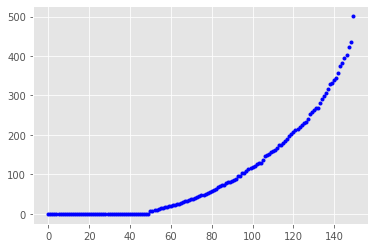

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import numpy as np
import numpy as np
n = 100
m = 150
c = []
#your code here
A = np.random.normal(0, 1, n*m).reshape(n, m)
B = np.random.normal(0, 1, m*m).reshape(m, m)
b = np.random.uniform(size=m)
A1 = A+A
A2 = B*B.transpose()
A3 = B.transpose()*B
print(A1,A2,A3)
x = np.linalg.solve(B, b)
print(x)
C = (A.T).dot(A)
w1,v1 = np.linalg.eig(C)
w2,v2 = np.linalg.eigh(C)

print(max(np.abs(np.imag(w1))))
plt.plot(np.sort(w2), 'b.')
plt.show()

## Question 2: simple linear regression with `numpy`

Recall from Statistics 1 that the linear model $$f(X) = \alpha + \beta X,$$ where $\theta = (\alpha, \beta)$ are parameters of the model. We have a sequence of measurements for the pair $(X,Y)$, say $\{x_i, y_i\}_{i=1}^n$, with which we will aim to estimate parameters $\theta$ in the model. Here $X$ is known as the independent variable (input), $Y$ the dependent variable (target).

Recall that the least squares estimates, which minimises $$\sum_{i=1}^n (y_i - f(x_i))^2$$ is given as follows:

\begin{eqnarray}
    \hat\beta &=& \frac{\sum_i (x_i - \bar x) (y_i - \bar y)}{\sum_i (x_i - \bar x)^2} \\
    \alpha &=& \bar y - \hat\beta \bar x.
\end{eqnarray}

We often use the $R^2$ metric, known as the coefficient of determination, to measure how well the model fits the data:
$$R^2 = 1- \frac{SS_{residual}}{SS_{total}},$$
where
\begin{eqnarray*}
SS_{total} = \sum_i (y_i - \bar y)^2, \quad SS_{residual} = \sum_i (y_i - f(x_i))^2.
\end{eqnarray*}

We first import the data file `Salary_Data.csv`. Then we go through these steps:

1. Convert the pandas data frame into `numpy` array and define them as input and target variable, `X` and `Y`.
1. Make a scatter plot of these data points.
1. Calculate $\alpha$ and $\beta$, as well the predicted output $\hat y_i$.
1. Calculate the coefficient of determination $R^2$.
1. Add the fitted line to the plot you made earlier.

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1

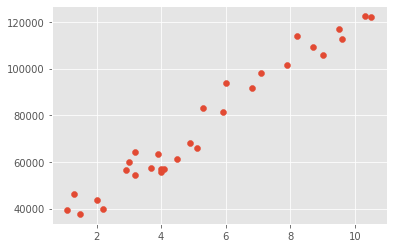

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Salary_Data.csv')
print(df)



# your code here
X =np.array(df.YearsExperience)
Y =np.array(df.Salary)
print(X,Y)
plt.scatter(X,Y)
beta = np.sum( (X - X.mean()) * (Y - Y.mean()) ) / np.sum( (X - X.mean()) * (X - X.mean()) )
alpha=Y.mean()-beta*X.mean()
Yi = alpha + beta*X
print(alpha,beta,Yi)
Stotal = np.sum((Y-Y.mean())**2)
Sresidual = np.sum((Y-Yi)**2)
R2 = 1-Sresidual/Stotal
print(Stotal,Sresidual,R2)

## Question 3: analysing the Titanic disaster with `pandas`

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic). More about the variables can be found [here](https://www.kaggle.com/c/titanic/data)

We first import the data and print out the head and tail of the data set.

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('titanic.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now we ask the following questions regarding the dataset.

1. How many people are in the dataset? How many survived?
1. Create a pie chart presenting the male/female proportion, using `matplotlib.pyplot.pie`. Experiment with the setting to make the pie chart look cool.
1. Plot a histogram with the fare payed.
1. Create a scatterplot with the Fare payed and the Age, differ the plot colour by gender.
1. Use the `groupby` and `aggregate` methods of a data frame to create another data frame with `Pclass` as the index. For each `Pclass`, i.e. 1, 2, or 3, count how many passengers are in this class (the first column) and how many in this class survived (the second column). Create a thrid column for this data frame out of the proportion of surviving passengers in each `Pclass`.
1. Plot a bar chart of the data frame you obtained in the last question.

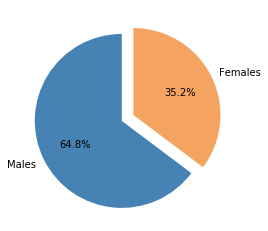

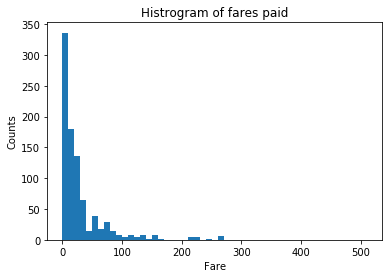

        count  sum
Pclass            
1         216  136
2         184   87
3         491  119
        count  sum  proportion
Pclass                        
1         216  136    0.629630
2         184   87    0.472826
3         491  119    0.242363


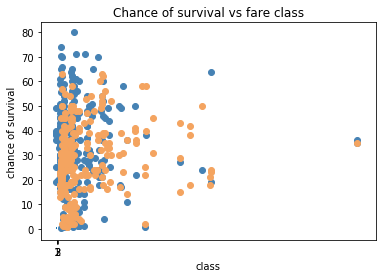

In [66]:
# your code here
n=len(df1)
m = df1.Survived.sum()
males = (df1['Sex'] == 'male').sum()
females = (df1['Sex']=='female').sum()
plt.pie([males,females], labels = ['Males', 'Females']
    ,colors=['steelblue','sandybrown']
    ,explode = (0.15,0),
    startangle = 90,
    autopct = '%1.1f%%')
plt.show()
bins=np.arange(0,520,10)
plt.hist(df1.Fare,bins = bins)
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.title('Histrogram of fares paid')
plt.show()
plt.scatter(df1[df1.Sex=='male'].Fare,df1[df1.Sex=='male'].Age,color='steelblue')
plt.scatter(df1[df1.Sex=='female'].Fare,df1[df1.Sex=='female'].Age,color='sandybrown')
#plt.scatter(df1[df1.Sex=='male'].Age, df1[df1.Sex=='male'].Fare,
           # color='steelblue', label='male')
#plt.scatter(df1[df1.Sex=='female'].Age, df1[df1.Sex=='female'].Fare,
            #color='sandybrown', label='female')
df2 = df1.groupby('Pclass')['Survived'].aggregate(['count', 'sum'])
print(df2)
df2['proportion'] = df2['sum'] / df2['count']
print(df2)
plt.bar(df2.index, df2.proportion, tick_label=df2.index)
plt.xlabel('class')
plt.ylabel('chance of survival')
plt.title('Chance of survival vs fare class')
plt.show()
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    